In [0]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***SBM-RGBD DATASET***

# ***Abandoned2***

# Frame Differencing

In [0]:
inputs = glob.glob('/content/drive/My Drive/abandoned2/input/*.png')
inputs.sort()
depths= glob.glob('/content/drive/My Drive/abandoned2/depth/*.png')
depths.sort()
gt = glob.glob('/content/drive/My Drive/abandoned2/groundtruth/*.png')
gt.sort()

print(gt)

['/content/drive/My Drive/abandoned2/groundtruth/gt000057.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000061.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000065.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000069.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000073.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000077.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000081.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000085.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000089.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000093.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000097.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000117.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000131.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000133.png', '/content/drive/My Drive/abandoned2/groundtruth/gt000135.png', '/content/drive/My Drive/abandoned2/groundtruth/gt0001

In [0]:
print_gt=[60,64,68,72,76,80,84,88,92,96,116,130,142,182,206,226,249]

cnt=0
r,c=cv2.cvtColor(cv2.imread(inputs[0]), cv2.COLOR_BGR2GRAY).shape
bkg=cv2.cvtColor(cv2.imread(inputs[10]), cv2.COLOR_BGR2GRAY)

60


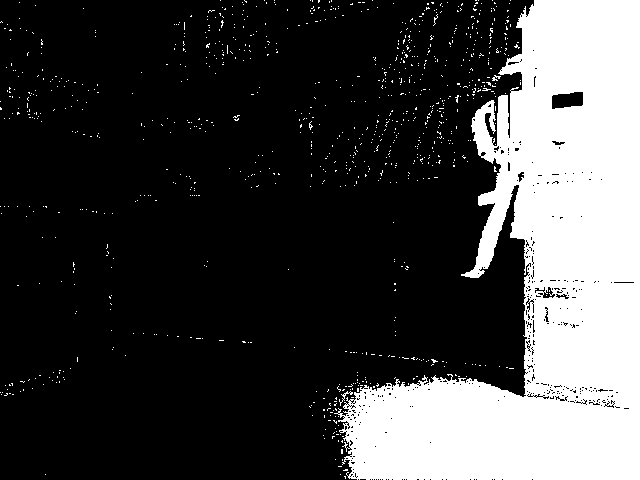

64


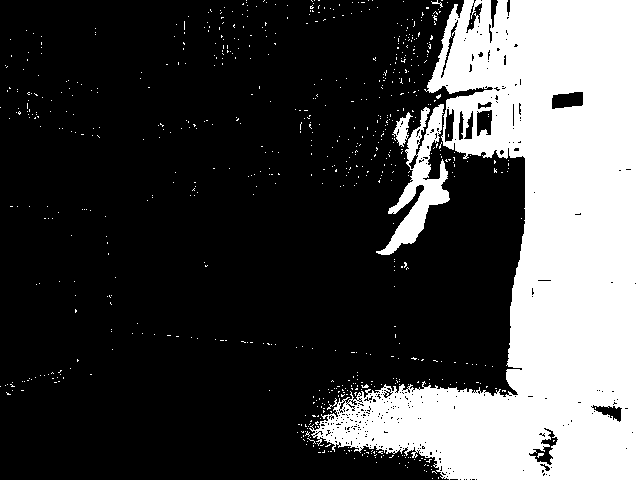

68


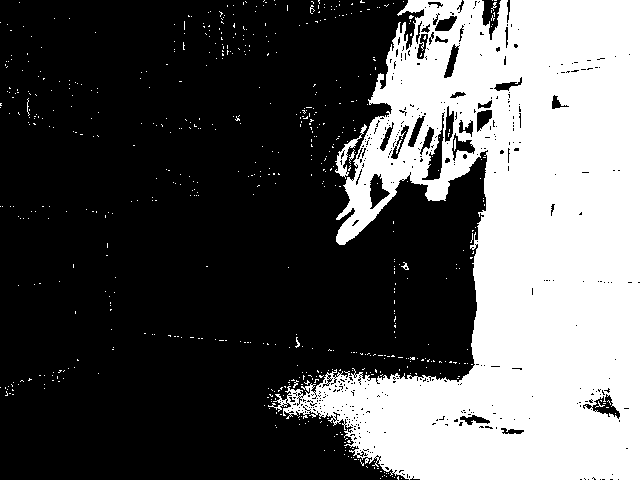

72


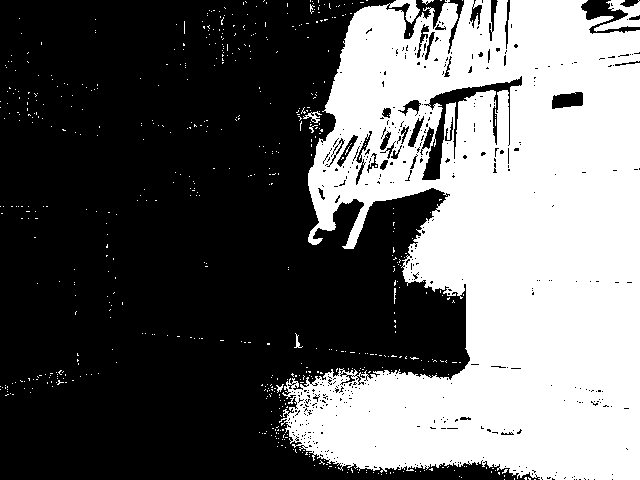

76


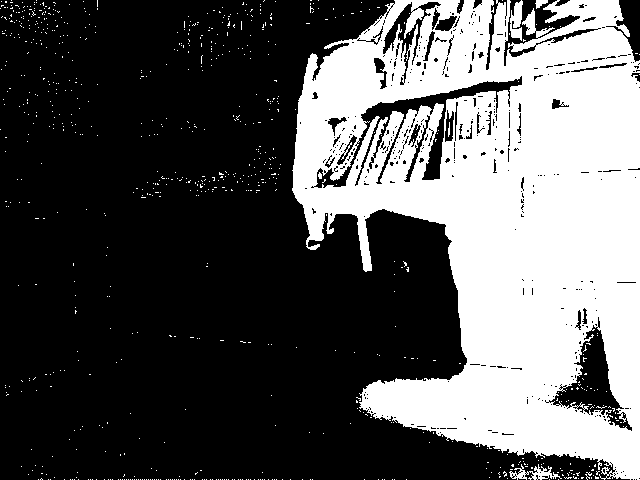

80


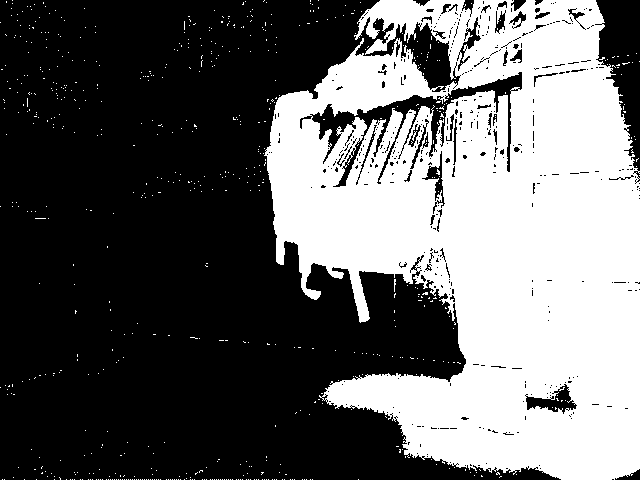

84


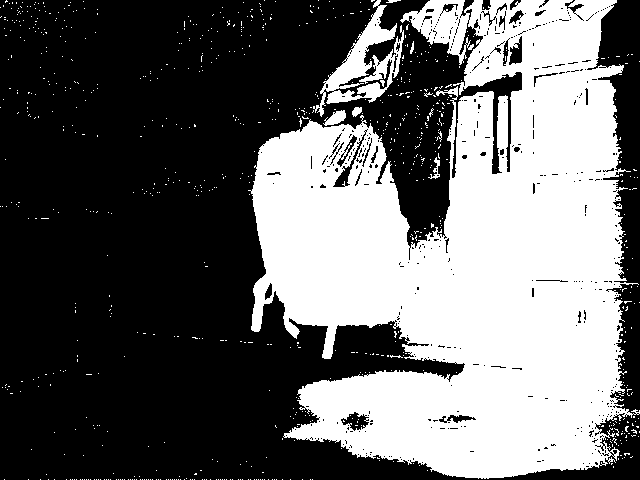

88


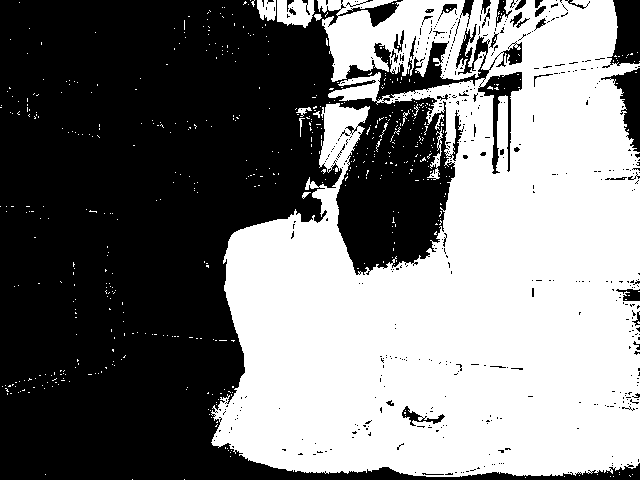

92


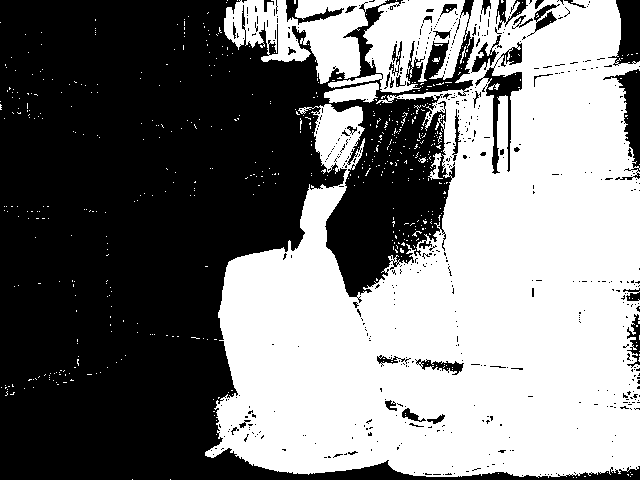

96


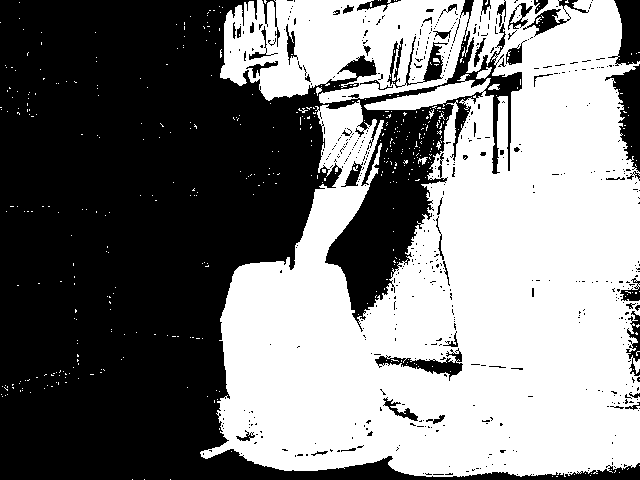

116


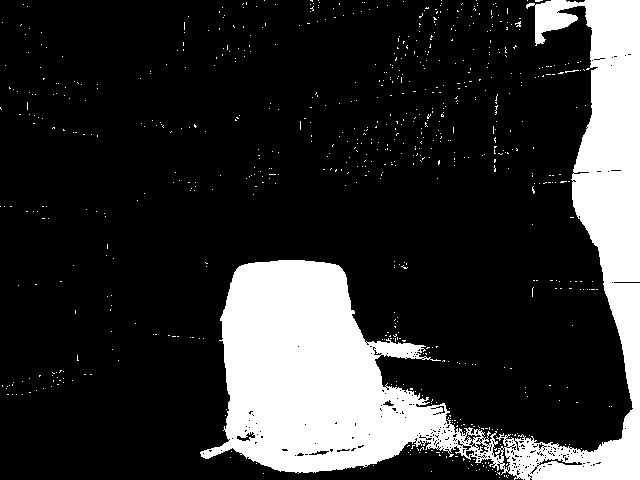

130


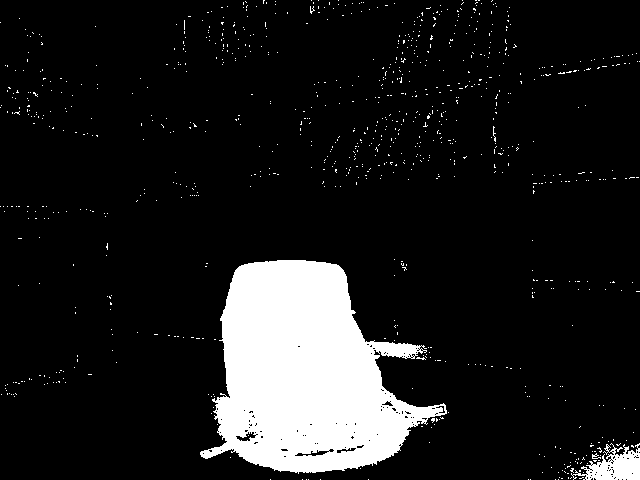

142


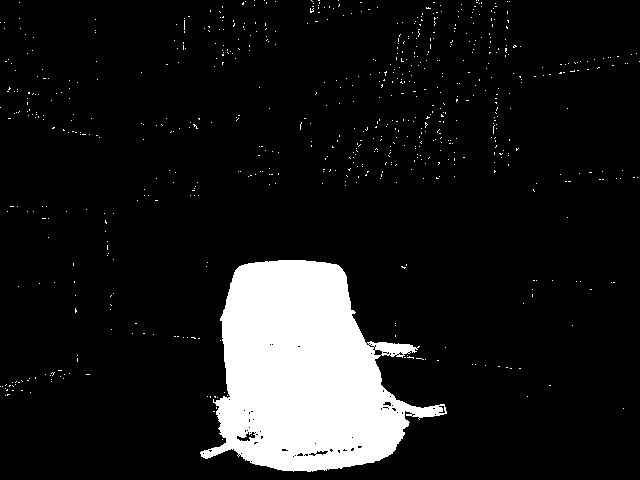

182


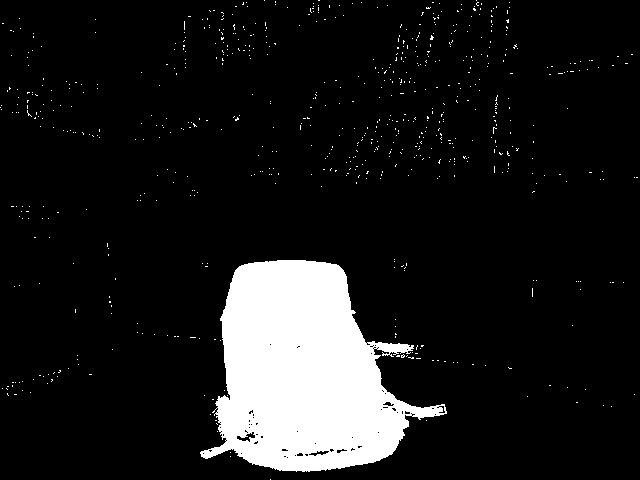

206


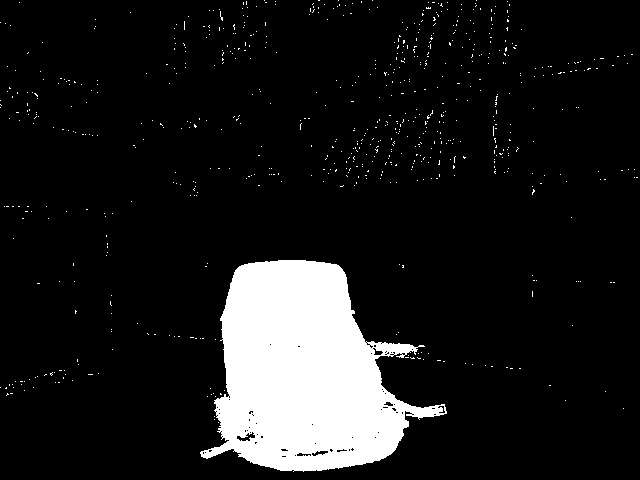

226


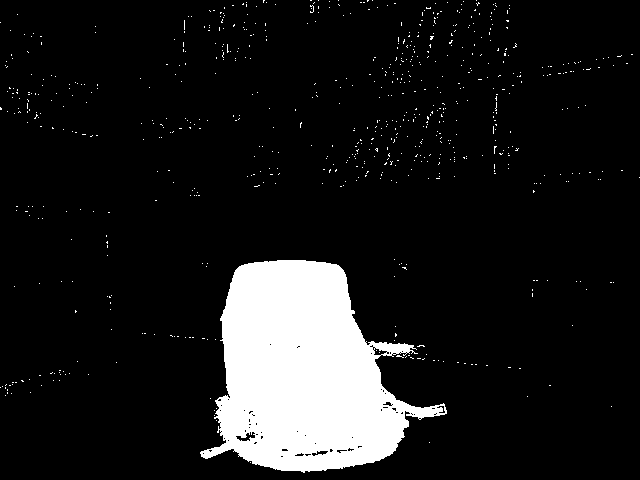

249


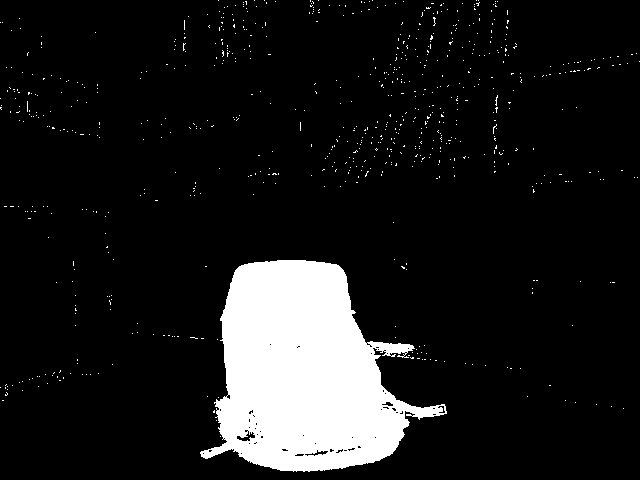

In [0]:
#without depth
def threshold(sums):
  for i in range(sums.shape[0]):
    for j in range(sums.shape[1]):
      if(sums[i][j]<60):
        sums[i][j]=0    #black
      else:
        sums[i][j]=255    #white
  return sums
    
for i in print_gt:
  icolor = cv2.cvtColor(cv2.imread(inputs[i]), cv2.COLOR_BGR2GRAY)
  icolor=abs(icolor-bkg)
  icolor=threshold(icolor)
  print(i)
  cv2_imshow(icolor)
  cv2.imwrite("/content/drive/My Drive/CV_Dataset/abandoned2/Results_without_depth/res_wod"+str(i)+".png",icolor)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


60


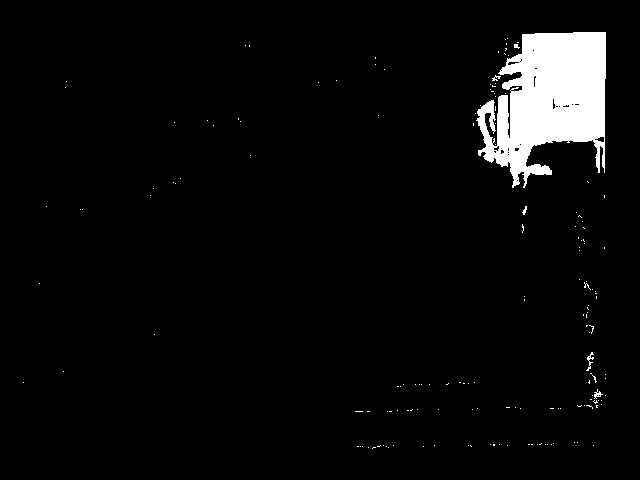

64


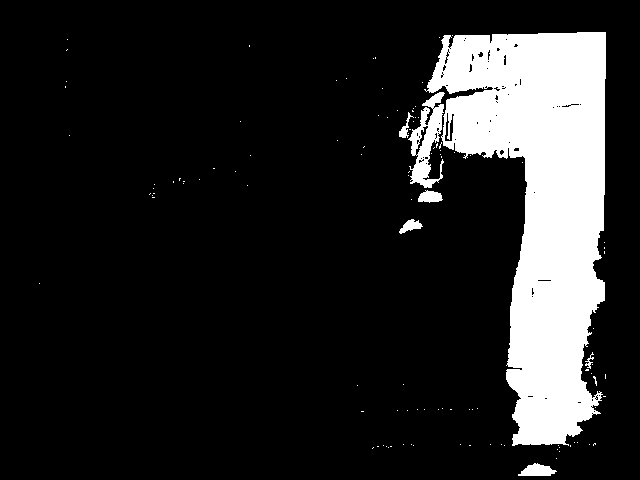

68


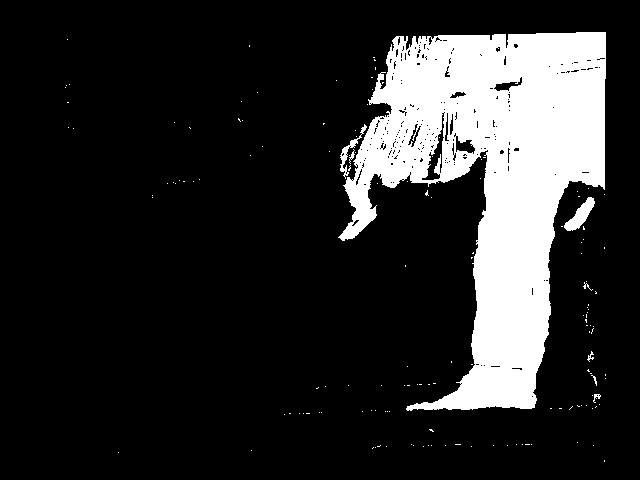

72


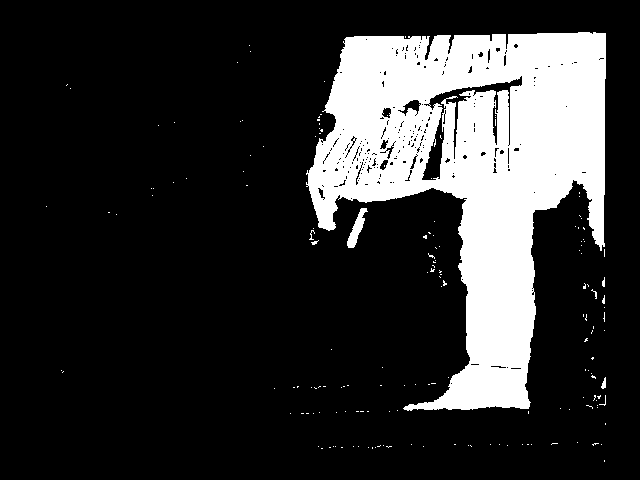

76


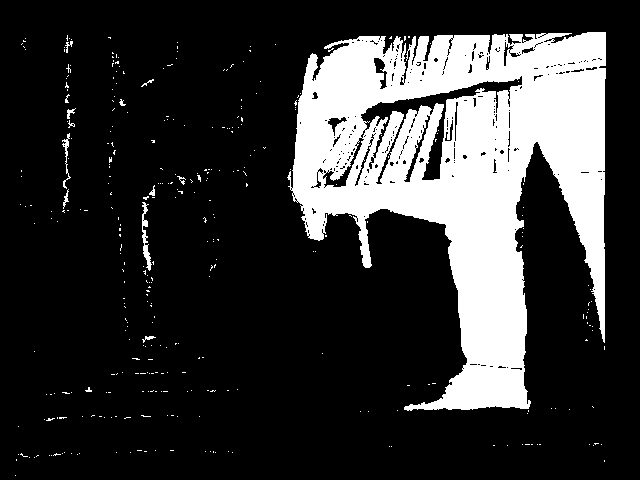

80


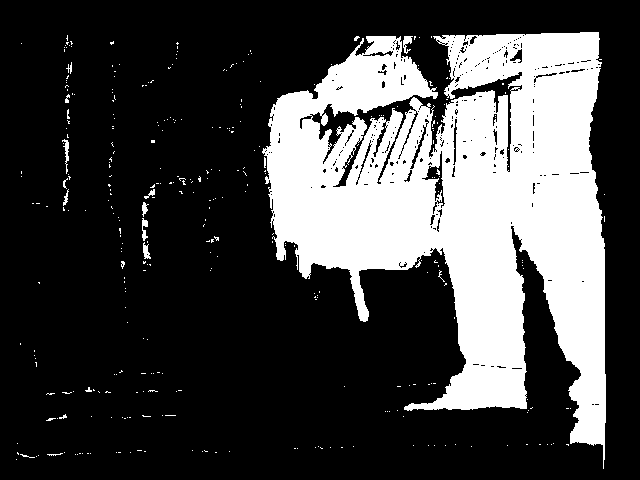

84


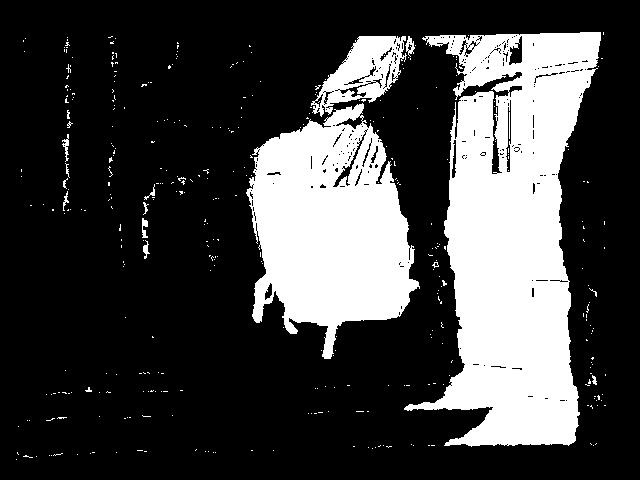

88


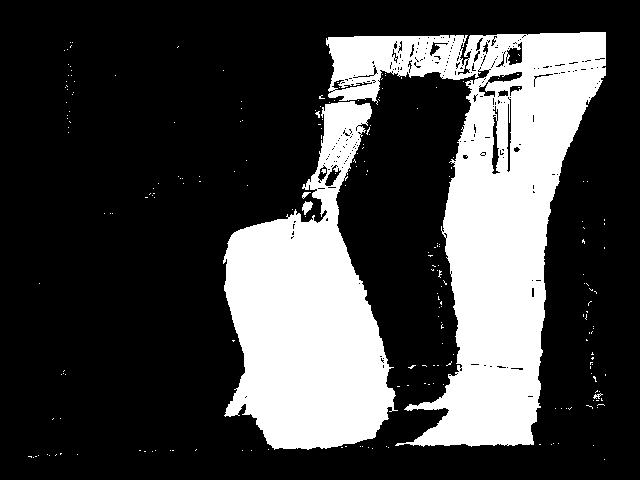

92


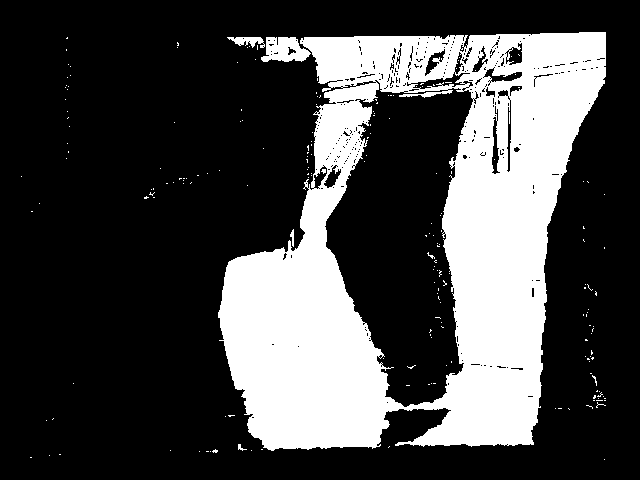

96


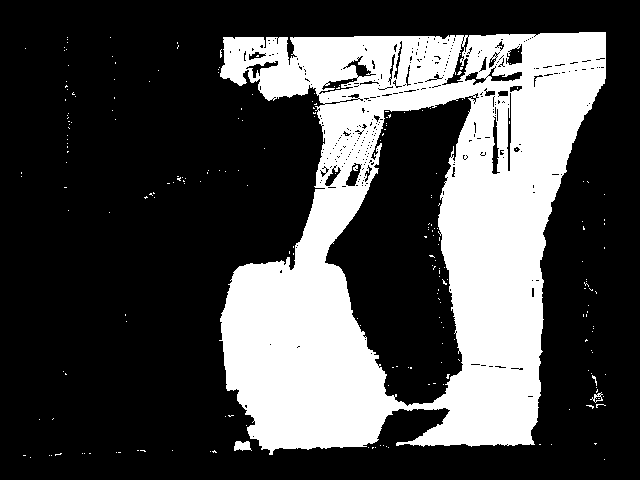

116


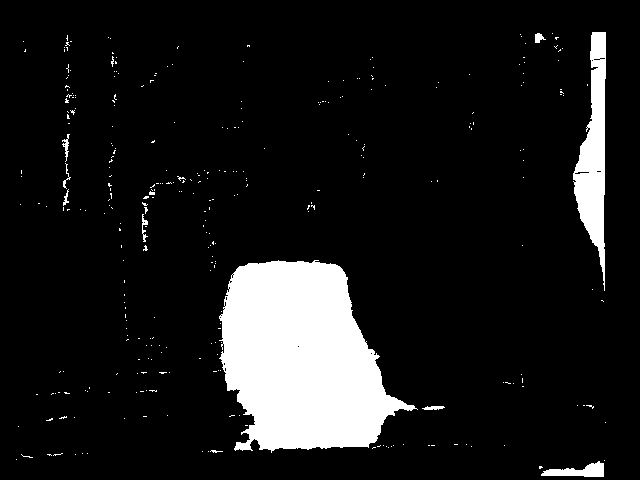

130


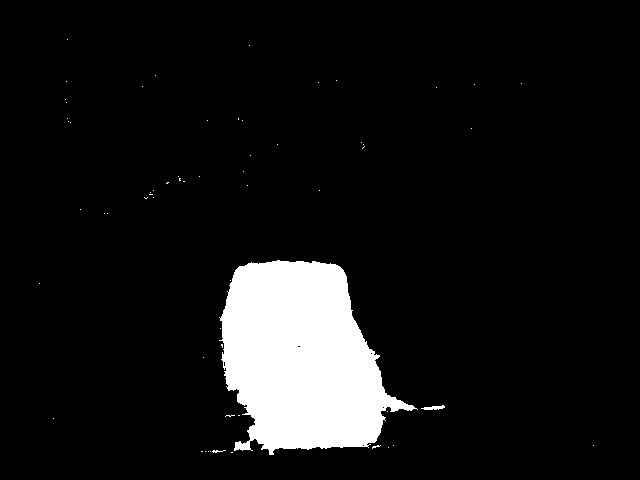

142


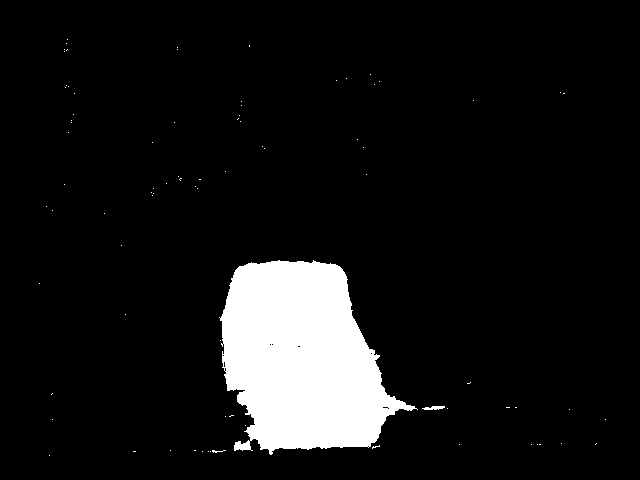

182


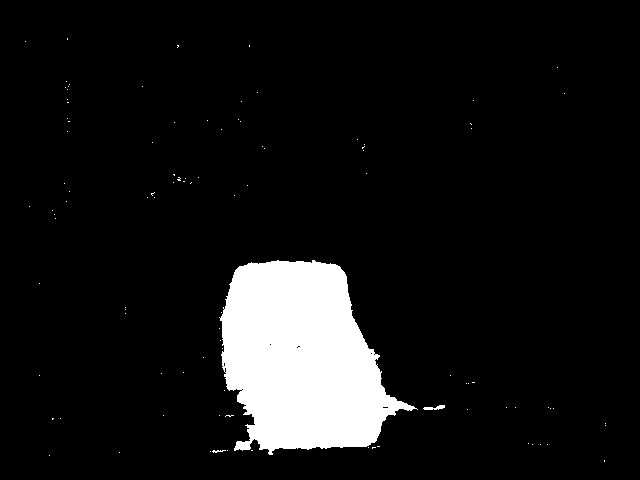

206


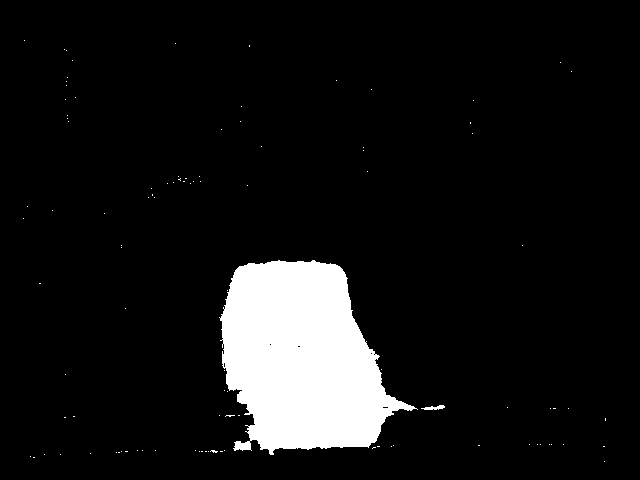

226


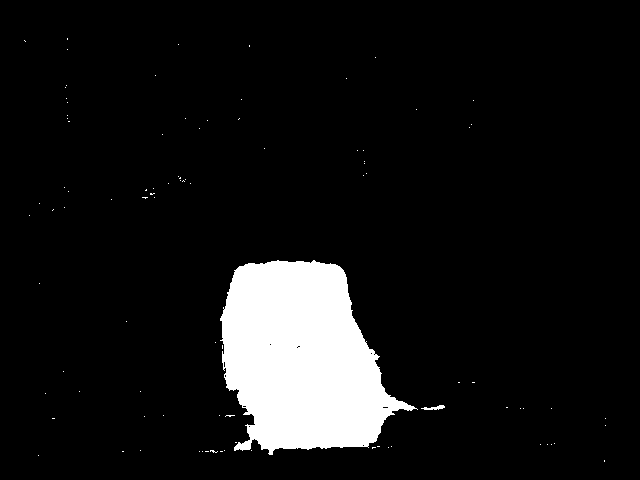

249


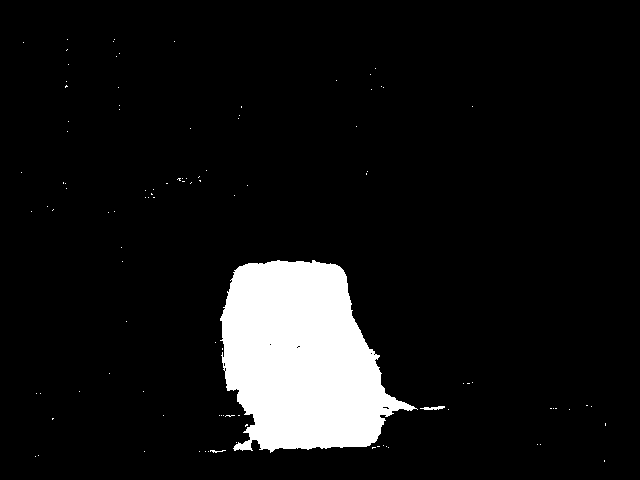

In [0]:
#with depth
def threshold_depth(x,depth_img,bkg_depth):
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      if(x[i][j]>35 and abs(depth_img[i][j][0]-bkg_depth[i][j][0])>=2):
        x[i][j]=255  #white
      else:
        x[i][j]=0  #black
  return x


bkg_depth = cv2.imread(depths[0]) 

for i in print_gt:
  
  icolor = cv2.cvtColor(cv2.imread(inputs[i]), cv2.COLOR_BGR2GRAY)
  idepth = cv2.imread(depths[i])
  icolor=abs(icolor-bkg)
  icolor=threshold_depth(icolor,idepth,bkg_depth)
  print(i)
  cv2_imshow(icolor)
  cv2.imwrite("/content/drive/My Drive/CV_Dataset/abandoned2/Results_with_depth/res_wd"+str(i)+".png",icolor)
  

In [0]:
def confMat(gt,est):
  TP = 0
  FN = 0
  FP = 0
  TN = 0
  F=0
  for i in range(gt.shape[0]):
    for j in range(gt.shape[1]):
      if(gt[i][j]==est[i][j] and est[i][j]==255):
        TP=TP+1
      elif (gt[i][j] == 255 and est[i][j] == 0):
        FN+=1
        F+=1
      elif (gt[i][j]==0 and est[i][j] == 255):
        FP+=1
        F+=1
      else:
        TN+=1
  accuracy=(TP+TN)/(TP+TN+F)
  
  if TP==0:
    precision=0
  else:
    precision= TP/(TP+FP)

  js=TP/(TP+F)

  if (TP+FN)==0:
    recall = 0
  else:
    recall = TP/(TP+FN)
  
  if (precision+recall)==0:
    f_score = 0
  else:
    f_score = (2*precision*recall)/(precision+recall)
  #print(TP,FP,FN,TN)
  return(accuracy,f_score,js,precision)

In [0]:
print_gt=[60,64,68,72,76,80,84,88,92,96,116,130,142,182,206,226,249]
resp_gt=[1,2,3,4,5,6,7,8,9,10,11,12,18,38,50,60,71]

results_wo_depth = glob.glob('/content/drive/My Drive/CV_Dataset/abandoned2/Results_without_depth/*.png')
results_w_depth= glob.glob('/content/drive/My Drive/CV_Dataset/abandoned2/Results_with_depth/*.png')

rwod=[0]
rwd=[0]
fwod = [0]
fwd = [0]


jswod=[0]    # jaccard similarity without depth
jswd=[0]     # jaccard similarity with depth
prwod=[0]   # precision without depth
prwd=[0]   # precision with depth

for i in range(len(print_gt)):
  kgt = cv2.cvtColor(cv2.imread(gt[resp_gt[i]]), cv2.COLOR_BGR2GRAY)
  for k in range(kgt.shape[0]):
    for j in range(kgt.shape[1]):    
      if kgt[k][j] == 85:
        kgt[k][j] = 0
  kest_wo_depth=cv2.cvtColor(cv2.imread(results_wo_depth[i]), cv2.COLOR_BGR2GRAY)  
  kest_w_depth=cv2.cvtColor(cv2.imread(results_w_depth[i]), cv2.COLOR_BGR2GRAY)
  arwod,fswod,jwod,pwod=confMat(kgt,kest_wo_depth)
  arwd,fswd,jwd,pwd=confMat(kgt,kest_w_depth)
  rwod.append(arwod)
  rwd.append(arwd)
  fwod.append(fswod)
  fwd.append(fswd)
  prwod.append(pwod)
  prwd.append(pwd)
  jswod.append(jwod)
  jswd.append(jwd)
  print("Image ",i+1," Without depth",arwod," With depth",arwd)

Image  1  Without depth 0.7860904947916667  With depth 0.9835611979166666
Image  2  Without depth 0.8459700520833333  With depth 0.97298828125
Image  3  Without depth 0.79580078125  With depth 0.968193359375
Image  4  Without depth 0.7760188802083333  With depth 0.965556640625
Image  5  Without depth 0.8298860677083333  With depth 0.94908203125
Image  6  Without depth 0.8364811197916666  With depth 0.941494140625
Image  7  Without depth 0.8236197916666667  With depth 0.9536067708333333
Image  8  Without depth 0.7586393229166667  With depth 0.957080078125
Image  9  Without depth 0.7552994791666666  With depth 0.952578125
Image  10  Without depth 0.759716796875  With depth 0.9550911458333333
Image  11  Without depth 0.917080078125  With depth 0.9874576822916666
Image  12  Without depth 0.9735091145833333  With depth 0.9958138020833334
Image  13  Without depth 0.9819954427083334  With depth 0.9955924479166667
Image  14  Without depth 0.98189453125  With depth 0.995498046875
Image  15  Wit

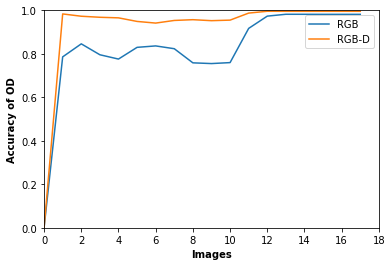

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(rwod)
plt.plot(rwd)
plt.xlim(0,18)
plt.ylim(0,1)
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy of OD', fontweight='bold')
plt.legend(['RGB','RGB-D'])

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/abandoned2/framediff_norm.png")

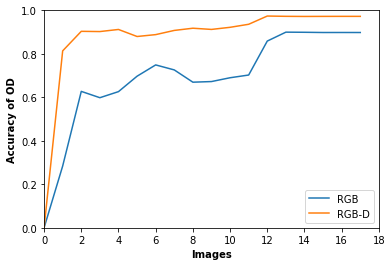

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(fwod)
plt.plot(fwd)
plt.xlim(0,18)
plt.ylim(0,1)
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy of OD', fontweight='bold')
plt.legend(['RGB','RGB-D'])

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/abandoned2/framediff_fscore_norm.png")

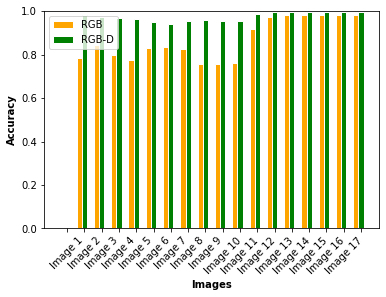

<Figure size 432x288 with 0 Axes>

In [0]:
# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(rwod))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, rwod, color='orange', width=barWidth, edgecolor='white', label='RGB')
plt.bar(r2, rwd, color='green', width=barWidth, edgecolor='white', label='RGB-D')
 
label =[]

for i in range(1,18):
  label.append('Image '+str(i))
  
# Add xticks on the middle of the group bars
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.ylim(0,1)
plt.xticks([r + barWidth for r in range(len(rwd))],label ,rotation=45)
 
# Create legend & Show graphic
plt.legend()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/abandoned2/framediff_bar.png")



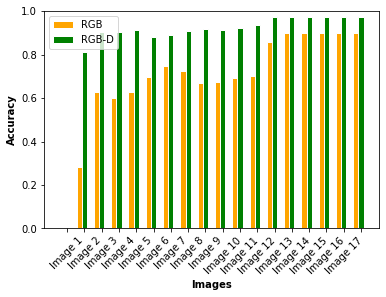

<Figure size 432x288 with 0 Axes>

In [0]:
# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(fwod))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, fwod, color='orange', width=barWidth, edgecolor='white', label='RGB')
plt.bar(r2, fwd, color='green', width=barWidth, edgecolor='white', label='RGB-D')
 
label =[]

for i in range(1,18):
  label.append('Image '+str(i))
  
# Add xticks on the middle of the group bars
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.ylim(0,1)
plt.xticks([r + barWidth for r in range(len(rwd))],label ,rotation=45)
 
# Create legend & Show graphic
plt.legend()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/abandoned2/framediff_fscore_bar.png")

# ***Sleeping_ds for moving object Detection***

# Averaging Filter

In [0]:

inputs = glob.glob('/content/drive/My Drive/CV_Dataset/Sleeping_ds/input/*.png')
inputs.sort()
depths= glob.glob('/content/drive/My Drive/CV_Dataset/Sleeping_ds/depth/*.png')
depths.sort()
gt = glob.glob('/content/drive/My Drive/CV_Dataset/Sleeping_ds/groundtruth/*.png')
gt.sort()


106


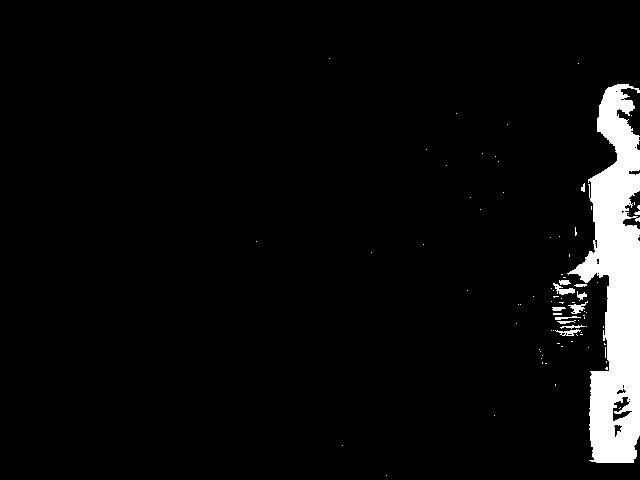

126


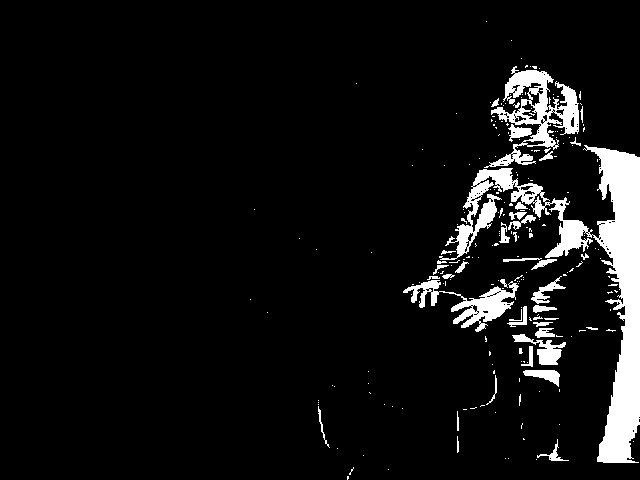

146


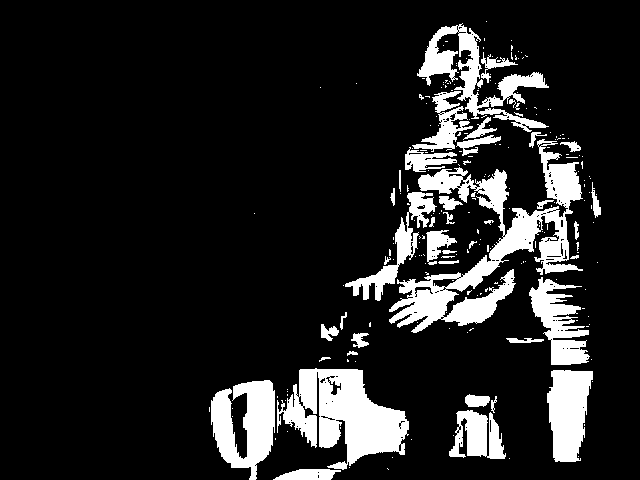

166


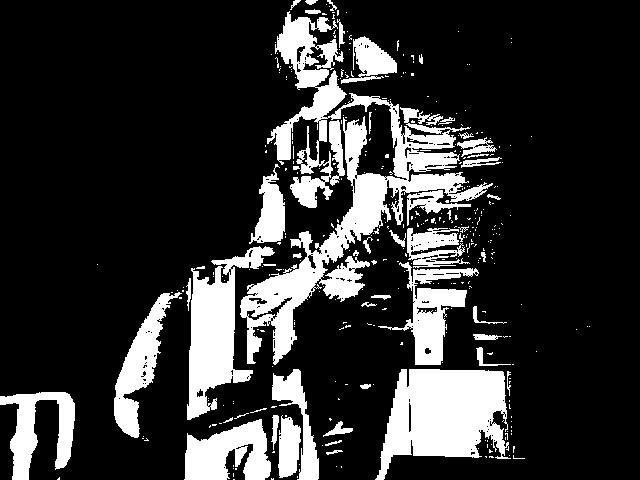

186


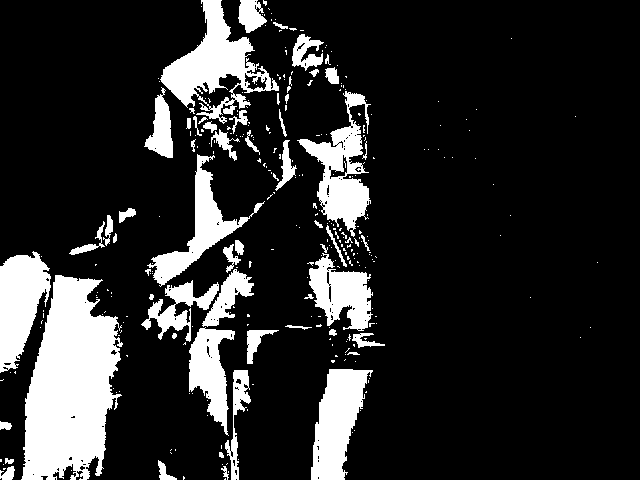

206


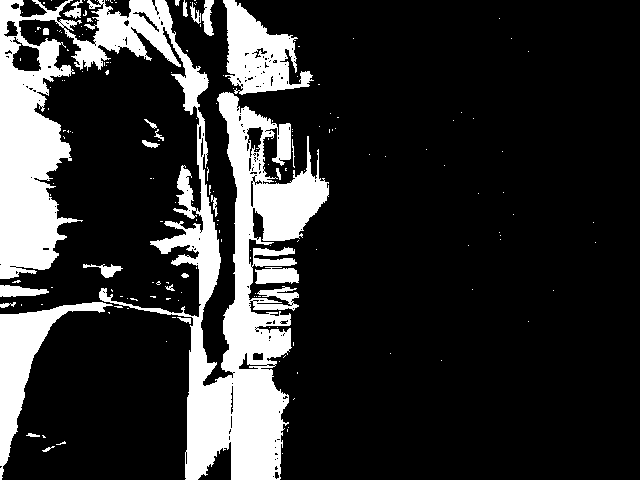

226


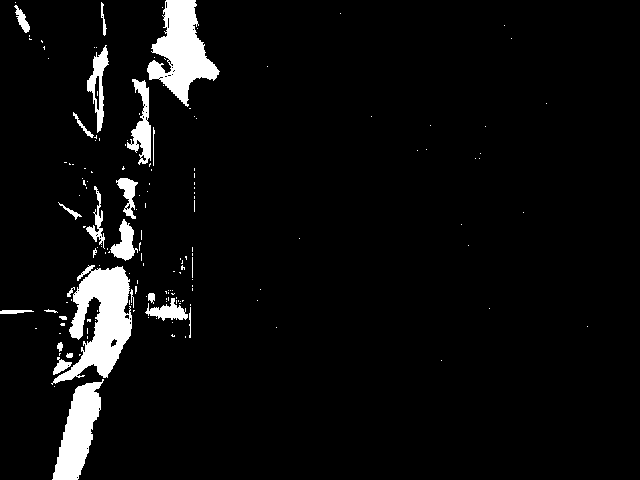

246


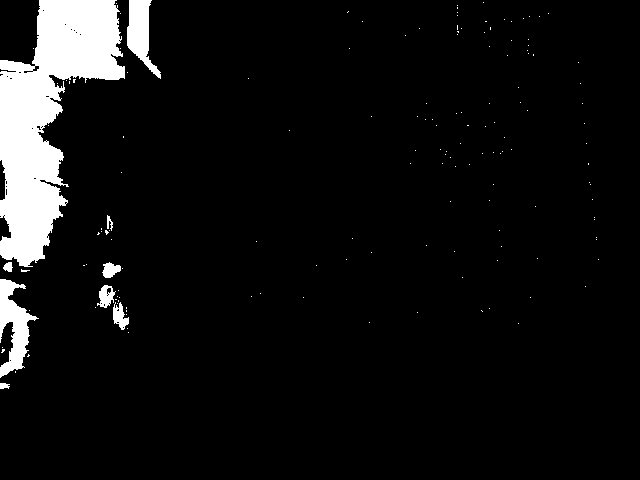

266


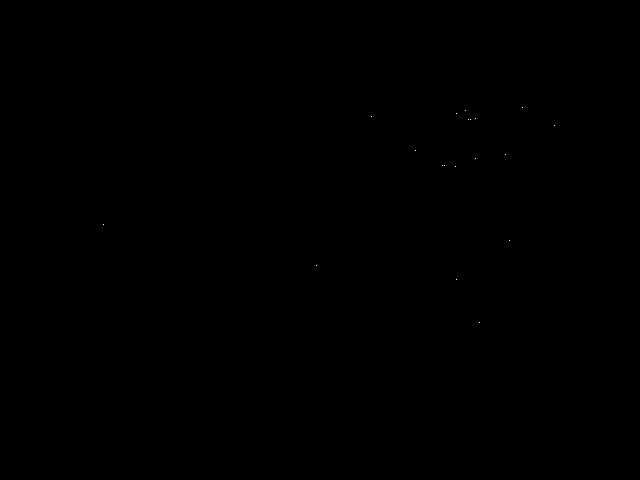

In [0]:
#without depth
def threshold(sums):
  for i in range(sums.shape[0]):
    for j in range(sums.shape[1]):
      if(sums[i][j]<40):
        sums[i][j]=0    #black
      else:
        sums[i][j]=255    #white
  return sums
    
count = 0

r,c = cv2.cvtColor(cv2.imread(inputs[0]), cv2.COLOR_BGR2GRAY).shape
img_sum = [[0]*c]*r
for i in range(87,268):
  icolor = cv2.cvtColor(cv2.imread(inputs[i]), cv2.COLOR_BGR2GRAY)
  count += 1
  img_sum = img_sum + icolor
  if count%20==0:
    img_sum = img_sum/20
    icolor=abs(icolor-img_sum)
    icolor=threshold(icolor)
    print(i)
    cv2_imshow(icolor)
    img_sum = [[0]*c]*r
    cv2.imwrite("/content/drive/My Drive/CV_Dataset/Sleeping_ds/Results_without_depth/res_wod"+str(i)+".png",icolor)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


106


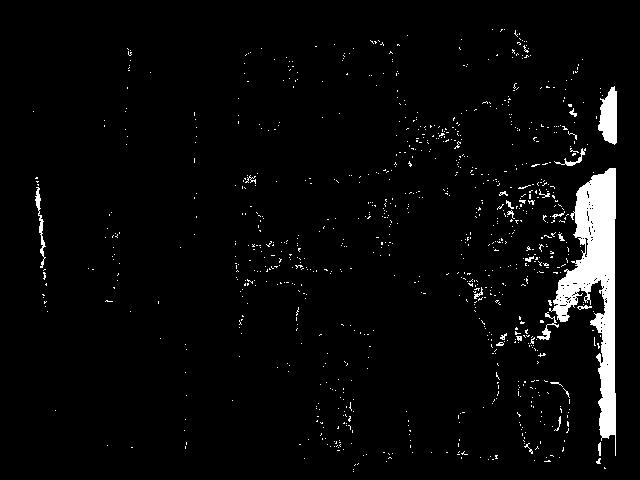

126


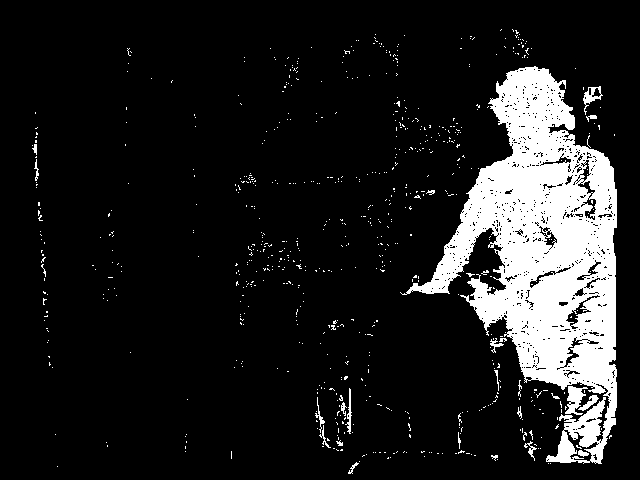

146


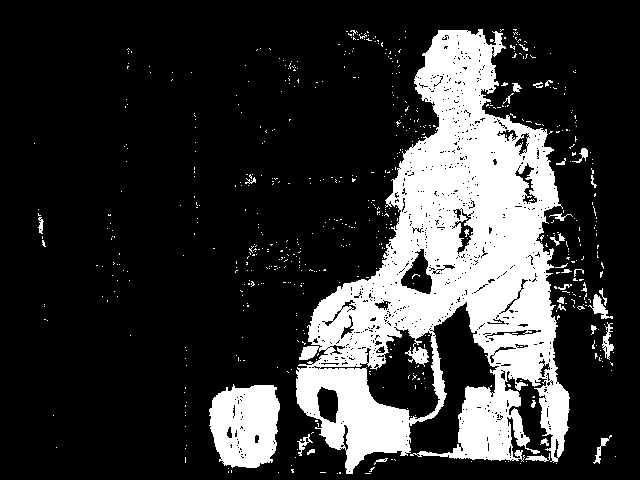

166


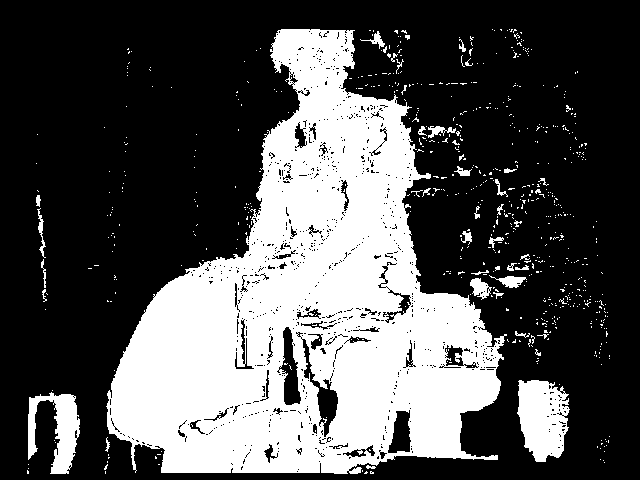

186


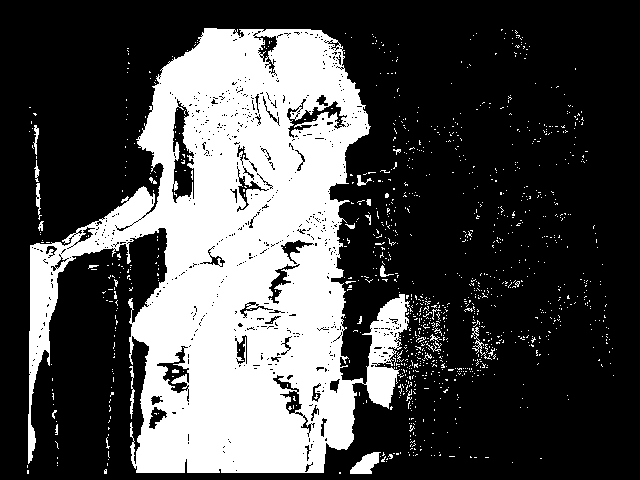

206


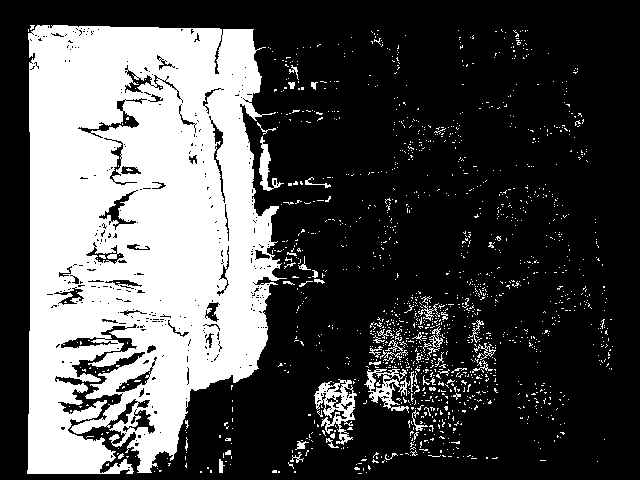

226


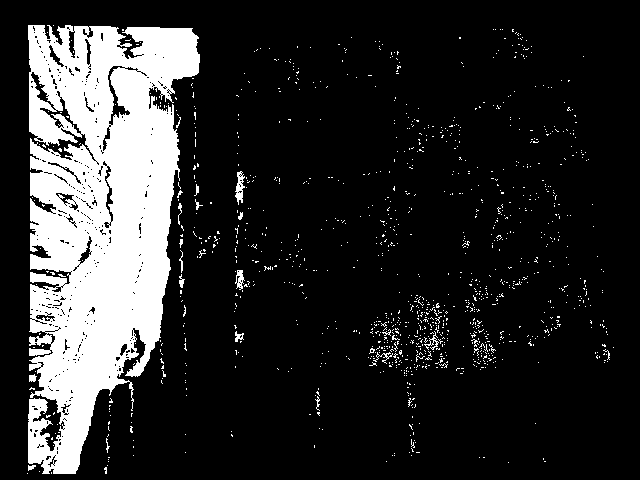

246


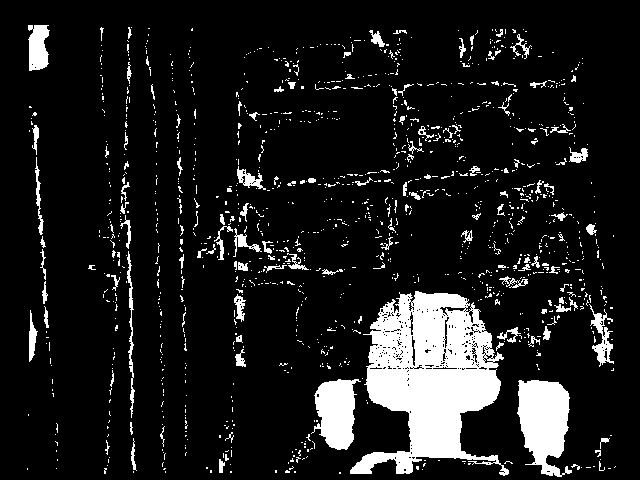

266


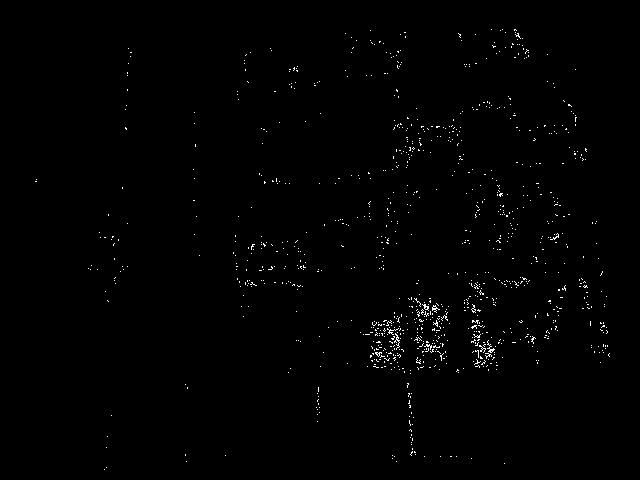

In [0]:
#with depth
def threshold_depth(x,depth_img,bkg_depth):
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      if(x[i][j]>4 and abs(depth_img[i][j][0]-bkg_depth[i][j][0])>=1):
        x[i][j]=255  #white
      else:
        x[i][j]=0  #black
  return x

r,c = cv2.cvtColor(cv2.imread(inputs[0]), cv2.COLOR_BGR2GRAY).shape
img_sum = [[0]*c]*r
count=0
bkg_depth = cv2.imread(depths[0]) 

for i in range(87,267):
  icolor = cv2.cvtColor(cv2.imread(inputs[i]), cv2.COLOR_BGR2GRAY)
  count += 1
  img_sum = img_sum + icolor
  
  if count%20==0:
    img_sum = img_sum/20
    icolor=abs(icolor-img_sum)
    idepth = cv2.imread(depths[i])
    icolor=threshold_depth(icolor,idepth,bkg_depth)
    print(i)
    cv2_imshow(icolor)
    img_sum = [[0]*c]*r
    cv2.imwrite("/content/drive/My Drive/CV_Dataset/Sleeping_ds/Results_with_depth/res_wd"+str(i)+".png",icolor)
  

In [0]:
results_wo_depth = glob.glob('/content/drive/My Drive/CV_Dataset/Sleeping_ds/Results_without_depth/*.png')
results_w_depth= glob.glob('/content/drive/My Drive/CV_Dataset/Sleeping_ds/Results_with_depth/*.png')

rwod=[0]    # accuracy without depth
rwd=[0]     # accuracy with depth
fwod=[0]   # f-score without depth
fwd=[0]   # f-score with depth

jswod=[0]    # jaccard similarity without depth
jswd=[0]     # jaccard similarity with depth
prwod=[0]   # precision without depth
prwd=[0]   # precision with depth

for i in range(len(gt)):
  kgt = cv2.cvtColor(cv2.imread(gt[i]), cv2.COLOR_BGR2GRAY)
  kest_wo_depth=cv2.cvtColor(cv2.imread(results_wo_depth[i]), cv2.COLOR_BGR2GRAY)  
  kest_w_depth=cv2.cvtColor(cv2.imread(results_w_depth[i]), cv2.COLOR_BGR2GRAY)
  arwod,fswod,jwod,pwod=confMat(kgt,kest_wo_depth)
  arwd,fswd,jwd,pwd=confMat(kgt,kest_w_depth)
  rwod.append(arwod)
  rwd.append(arwd)
  fwod.append(fswod)
  fwd.append(fswd)
  prwod.append(pwod)
  prwd.append(pwd)
  jswod.append(jwod)
  jswd.append(jwd)
  print("Image ",i+1," Without depth",arwod," With depth",arwd)

Image  1  Without depth 0.9898404947916667  With depth 0.9808072916666667
Image  2  Without depth 0.9172200520833333  With depth 0.9672102864583333
Image  3  Without depth 0.8236751302083334  With depth 0.918818359375
Image  4  Without depth 0.7789485677083333  With depth 0.8981510416666667
Image  5  Without depth 0.7458072916666667  With depth 0.9202018229166666
Image  6  Without depth 0.7238639322916667  With depth 0.915498046875
Image  7  Without depth 0.8668522135416666  With depth 0.9310709635416666
Image  8  Without depth 0.965244140625  With depth 0.889619140625
Image  9  Without depth 0.9999381510416666  With depth 0.99265625


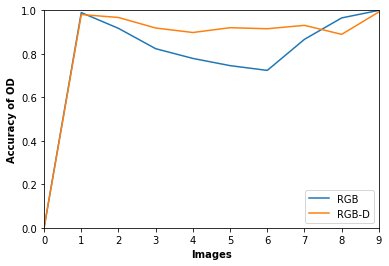

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(rwod)
plt.plot(rwd)
plt.xlim(0,9)
plt.ylim(0,1)
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy of OD', fontweight='bold')
plt.legend(['RGB','RGB-D'])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/Sleeping_ds/avg_norm.png")


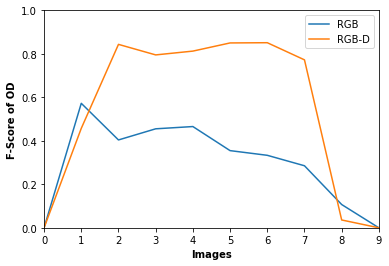

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(fwod)
plt.plot(fwd)
plt.xlim(0,9)
plt.ylim(0,1)
plt.xlabel('Images', fontweight='bold')
plt.ylabel('F-Score of OD', fontweight='bold')
plt.legend(['RGB','RGB-D'])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/Sleeping_ds/avg_fscore_norm.png")

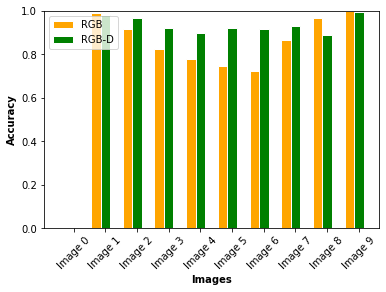

<Figure size 432x288 with 0 Axes>

In [0]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(rwod))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, rwod, color='orange', width=barWidth, edgecolor='white', label='RGB')
plt.bar(r2, rwd, color='green', width=barWidth, edgecolor='white', label='RGB-D')
 
label =[]

for i in range(0,11):
  label.append('Image '+str(i))
  
# Add xticks on the middle of the group bars
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.ylim(0,1)
plt.xticks([r + barWidth for r in range(len(rwd))],label ,rotation=45)
 
# Create legend & Show graphic
plt.legend()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/Sleeping_ds/avg_bar.png")

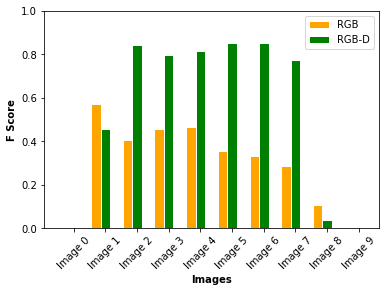

<Figure size 432x288 with 0 Axes>

In [0]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(fwod))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, fwod, color='orange', width=barWidth, edgecolor='white', label='RGB')
plt.bar(r2, fwd, color='green', width=barWidth, edgecolor='white', label='RGB-D')
 
label =[]

for i in range(0,11):
  label.append('Image '+str(i))
  
# Add xticks on the middle of the group bars
plt.xlabel('Images', fontweight='bold')
plt.ylabel('F Score', fontweight='bold')
plt.ylim(0,1)
plt.xticks([r + barWidth for r in range(len(fwd))],label ,rotation=45)
 
# Create legend & Show graphic
plt.legend()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/Sleeping_ds/avg_fscore_bar.png")

# ***Gaussian***

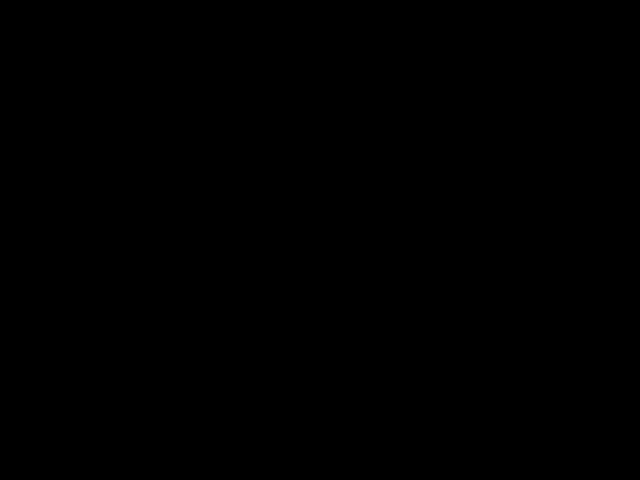

106


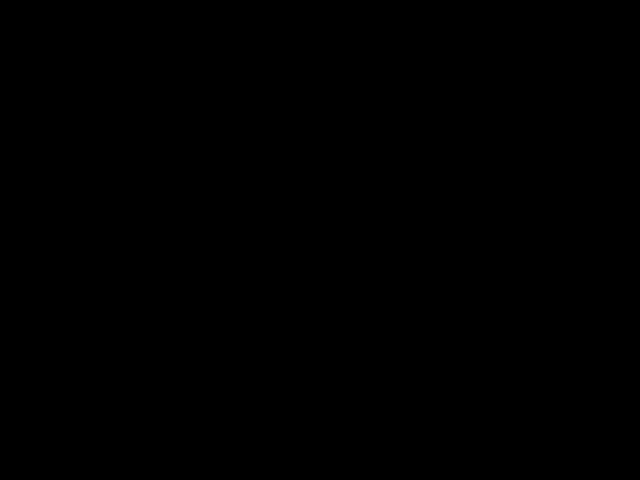

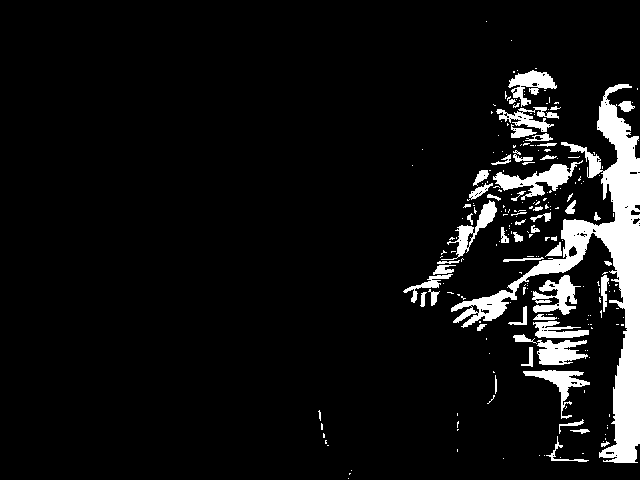

126


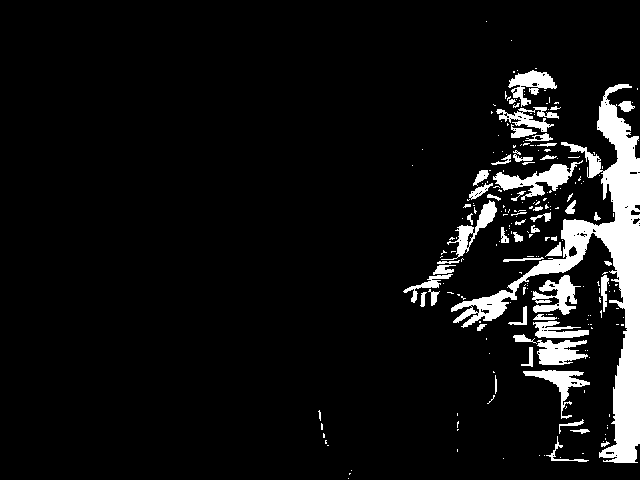

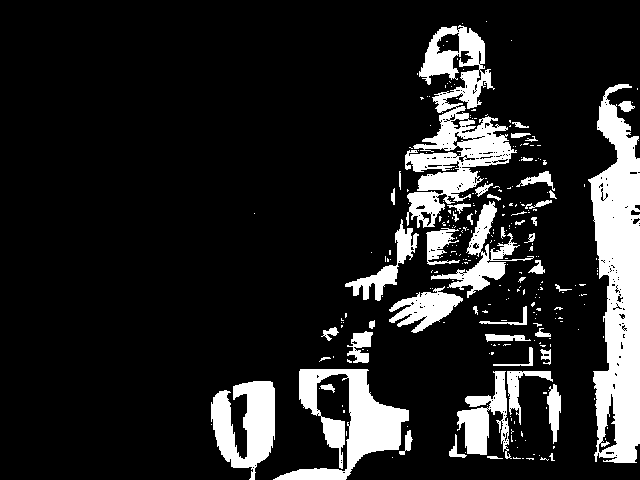

146


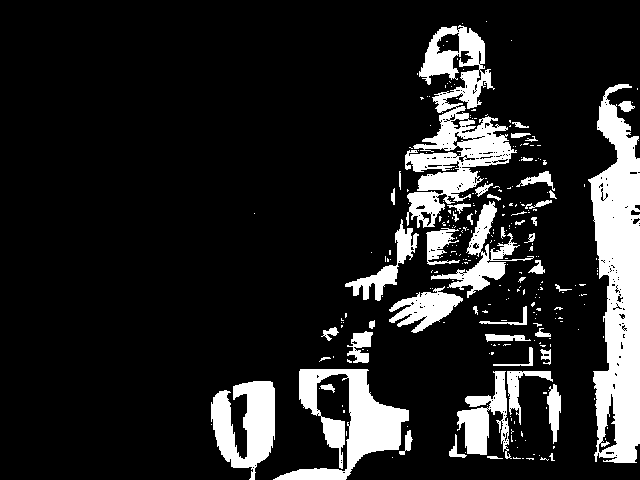

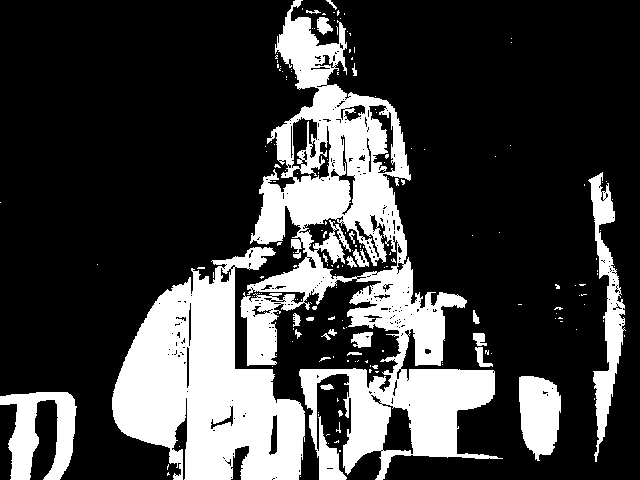

166


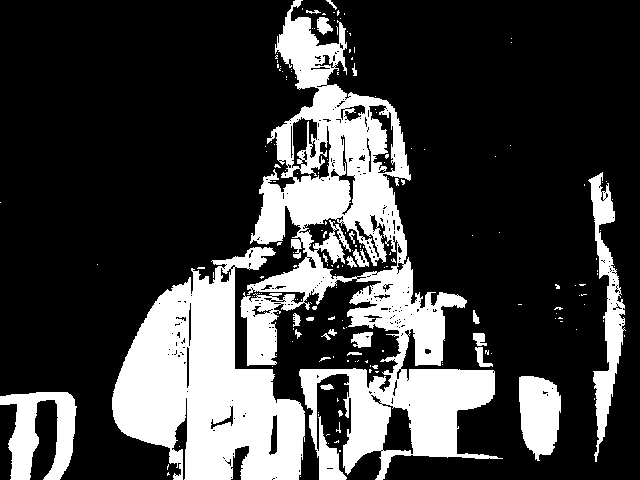

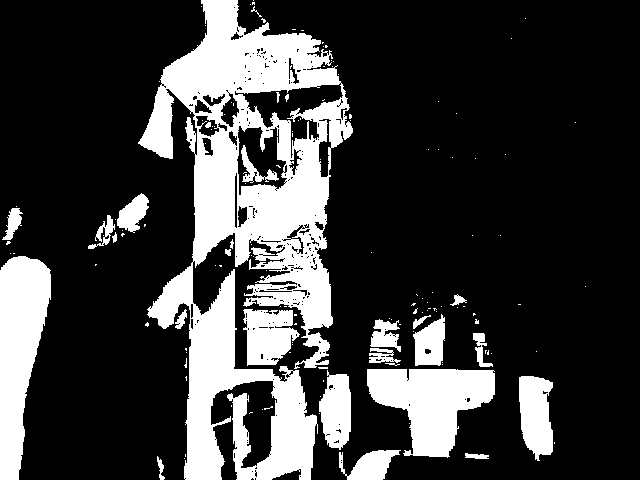

186


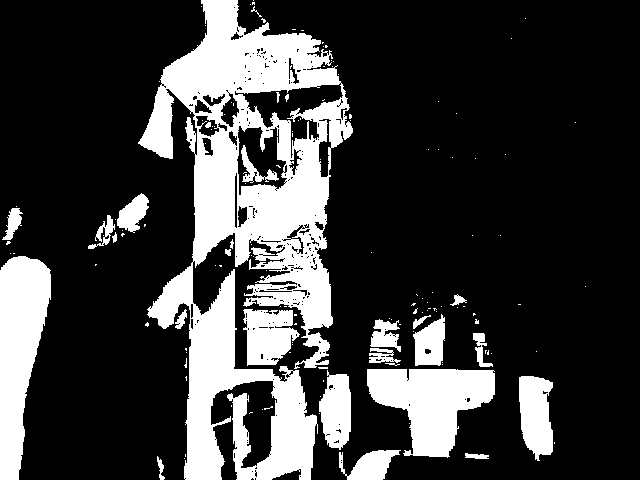

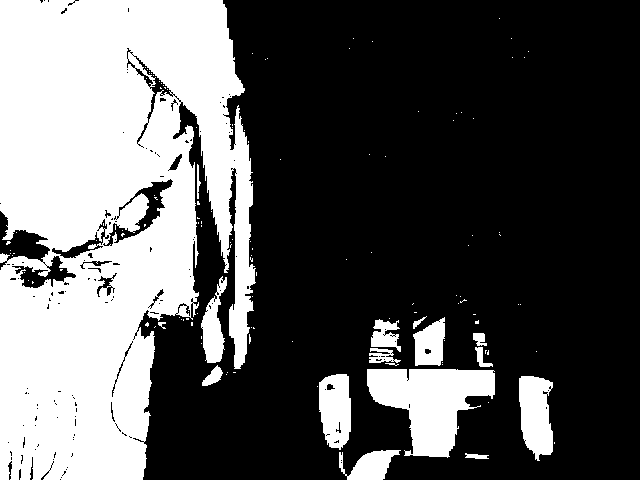

206


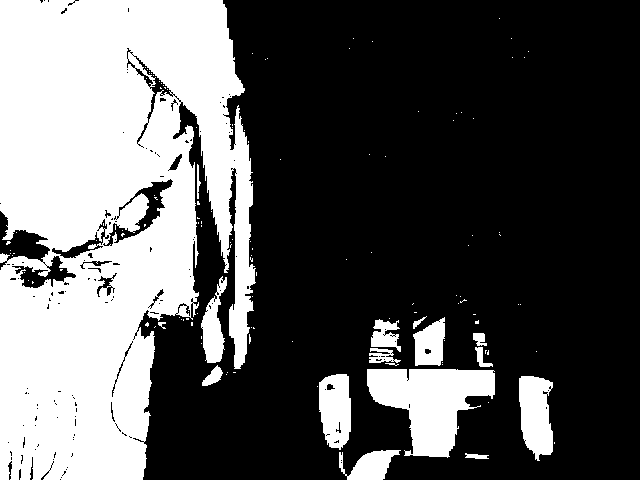

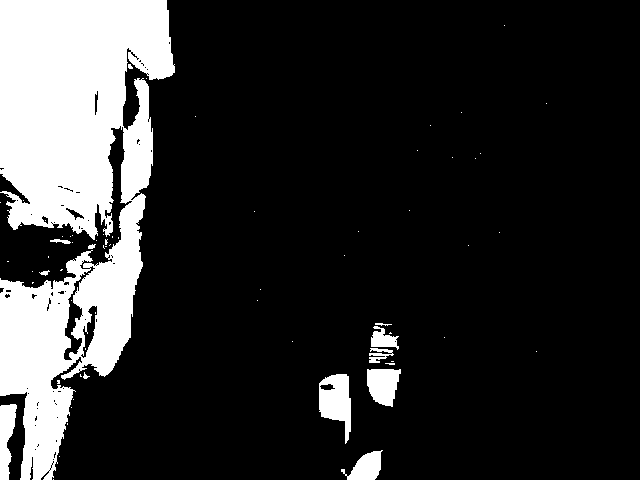

226


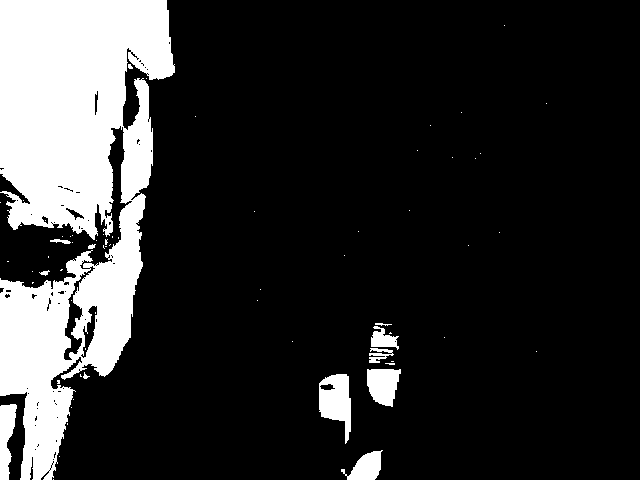

In [0]:
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
count=0
    
for i in range(87,228):
  count += 1
  if count%20==0:
    icolor = cv2.imread(inputs[i])
    fgmask = fgbg.apply(np.asarray(icolor))
    cv2_imshow(fgmask)
    print(i)
    cnt = 0    
    cv2_imshow(fgmask)
    cv2.imwrite("/content/drive/My Drive/CV_Dataset/Sleeping_ds/Results_without_depth_gaussian/res_wod"+str(i)+".png",fgmask)
 

In [0]:
results_wo_depth = glob.glob('/content/drive/My Drive/CV_Dataset/Sleeping_ds/Results_without_depth_gaussian/*.png')

rwod=[0]    # accuracy without depth
fwod=[0]   # f-score without depth
jswod=[0]    # jaccard similarity without depth
prwod=[0]   # precision without depth

for i in range(len(results_wo_depth)):
  kgt = cv2.cvtColor(cv2.imread(gt[i]), cv2.COLOR_BGR2GRAY)
  kest_wo_depth=cv2.cvtColor(cv2.imread(results_wo_depth[i]), cv2.COLOR_BGR2GRAY)  
  arwod,fswod,jwod,pwod=confMat(kgt,kest_wo_depth)
  rwod.append(arwod)
  fwod.append(fswod)
  jswod.append(jwod)
  prwod.append(pwod)
  print(arwod,fswod,jwod,pwod)
print(rwod,fwod,jswod,prwod)

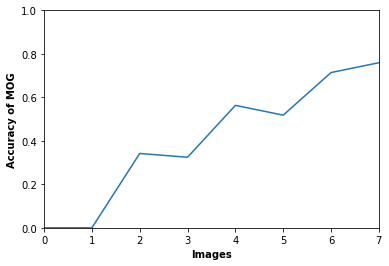

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(jswod)
plt.xlim(0,7)
plt.ylim(0,1)
plt.xlabel('Images', fontweight='bold')
plt.ylabel('Accuracy of MOG', fontweight='bold')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/content/drive/My Drive/CV_Dataset/Sleeping_ds/avg_norm_gaussian.png")
